# Wine Quality Classification

In [1]:
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
wine_quality = fetch_ucirepo(id=186) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

In [3]:
print(X)

      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  

In [4]:
print(y)

      quality
0           5
1           5
2           5
3           6
4           5
...       ...
6492        6
6493        5
6494        6
6495        7
6496        6

[6497 rows x 1 columns]


#### Pre-processing of data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train = y_train.values.flatten()
y_test = y_test.values.flatten() 

#### Unsupervised K-Means Clustering Model

In [7]:
kmeans = KMeans()
kmeans_labels_train = kmeans.fit_predict(X_train_scaled)

In [8]:
cluster_to_label = {}
for cluster in np.unique(kmeans_labels_train):
    cluster_indices = np.where(kmeans_labels_train == cluster)[0]  # Find the indices of the current cluster
    most_common_label = np.bincount(y_train[cluster_indices]).argmax()  # Get the most common label
    cluster_to_label[cluster] = most_common_label # Label each cluster

kmeans_labels_train_mapped = np.array([cluster_to_label[label] for label in kmeans_labels_train])

#### Unsupervised K-Means Clustering Model

In [9]:
kmeans_labels_test = kmeans.predict(X_test_scaled)
kmeans_labels_test_mapped = np.array([cluster_to_label[label] for label in kmeans_labels_test])

In [10]:
correct_predictions = np.sum(kmeans_labels_test_mapped == y_test)
total_predictions = len(y_test)

model_accuracy = correct_predictions / total_predictions
print(f"Accuracy: {model_accuracy:.4f}")

Accuracy: 0.4469


In [11]:
report = classification_report(y_test, kmeans_labels_test_mapped, target_names=[str(i) for i in np.unique(y_test)])
print("Classification Report (K-Means Clustering):\n", report)

Classification Report (K-Means Clustering):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        43
           5       0.42      0.60      0.49       402
           6       0.47      0.57      0.51       597
           7       0.00      0.00      0.00       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.45      1300
   macro avg       0.13      0.17      0.14      1300
weighted avg       0.35      0.45      0.39      1300



c:\Users\randa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\randa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\randa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

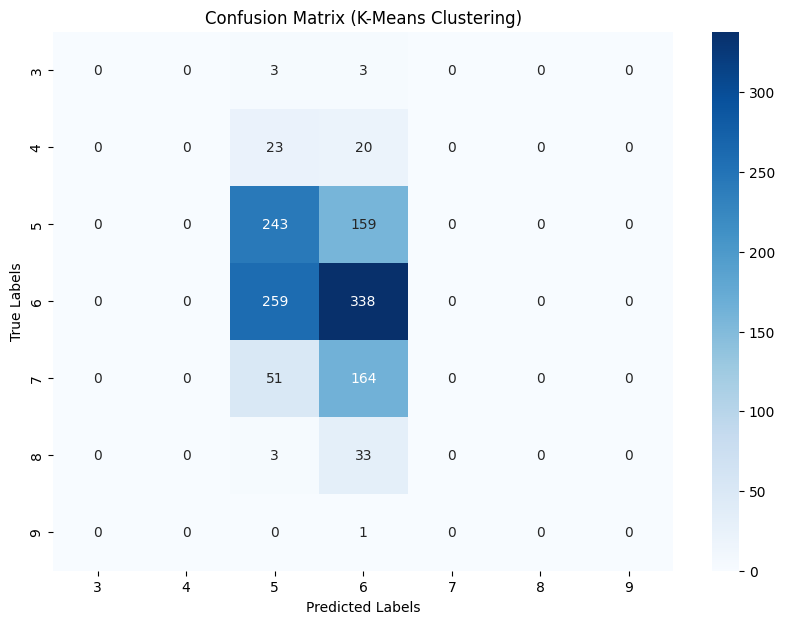

In [12]:
confusion_matrix1 = confusion_matrix(y_test, kmeans_labels_test_mapped)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (K-Means Clustering)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#### Supervised Logistic Regression Classification Model

In [13]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [14]:
y_pred = log_reg_model.predict(X_test_scaled)

In [15]:
correct_predictions = np.sum(y_pred == y_test)
total_predictions = len(y_test)

model_accuracy = correct_predictions / total_predictions 
print(f"Logistic Regression Accuracy: {model_accuracy:.4f}")

Logistic Regression Accuracy: 0.5362


In [18]:
report = classification_report(y_test, y_pred, target_names=[str(i) for i in np.unique(y_test)])
print("Classification Report (Logistic Regression):\n", report)

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00        43
           5       0.54      0.61      0.57       402
           6       0.54      0.68      0.60       597
           7       0.50      0.20      0.29       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.37      0.24      0.25      1300
weighted avg       0.50      0.54      0.50      1300



c:\Users\randa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\randa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\randa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

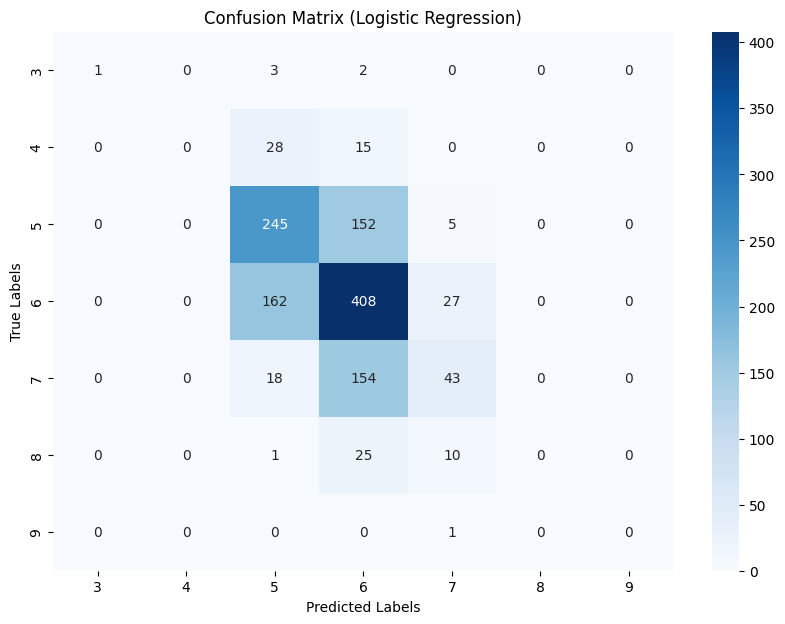

In [17]:
confusion_matrix2 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()